# Doing lottery with a quantum computer

On SC 2024 we did a joint raffle with [HPE](https://www.hpe.com/de/de/home.html) and [Classiq](https://de.classiq.io/). To have the fairest raffle possible, we decided to use a quantum computer to select the winners. This is a simple example of how to do it using Qiskit. You can use it for your needs by entering the first and last lottery ticket number distributed.

In order to run this notebook, you need to have the `"iqm-client[qiskit]"` package installed. You can install it using the following command:

In [ ]:
!pip install "iqm-client[qiskit]"

The first step is to connect to a quantum computer via IQM Resonance.

In [3]:
import os
os.environ["IQM_TOKEN"] = "YOUR_TOKEN"
# Instead of setting the environment variable, you could add the token as an argument to the IQMProvider constructor

from iqm.qiskit_iqm import IQMProvider
provider=IQMProvider(url="https://cocos.resonance.meetiqm.com/garnet")
backend = provider.get_backend()

Then, we can generate the circuit that will select the winner. We will use a quantum state sampled 10000 times to retrieve a random number between the first and last ticket number. The winner will be the person who has the ticket number that matches the random number generated by the quantum computer.


Running quantum raffle simulation...

Generating distribution plot...


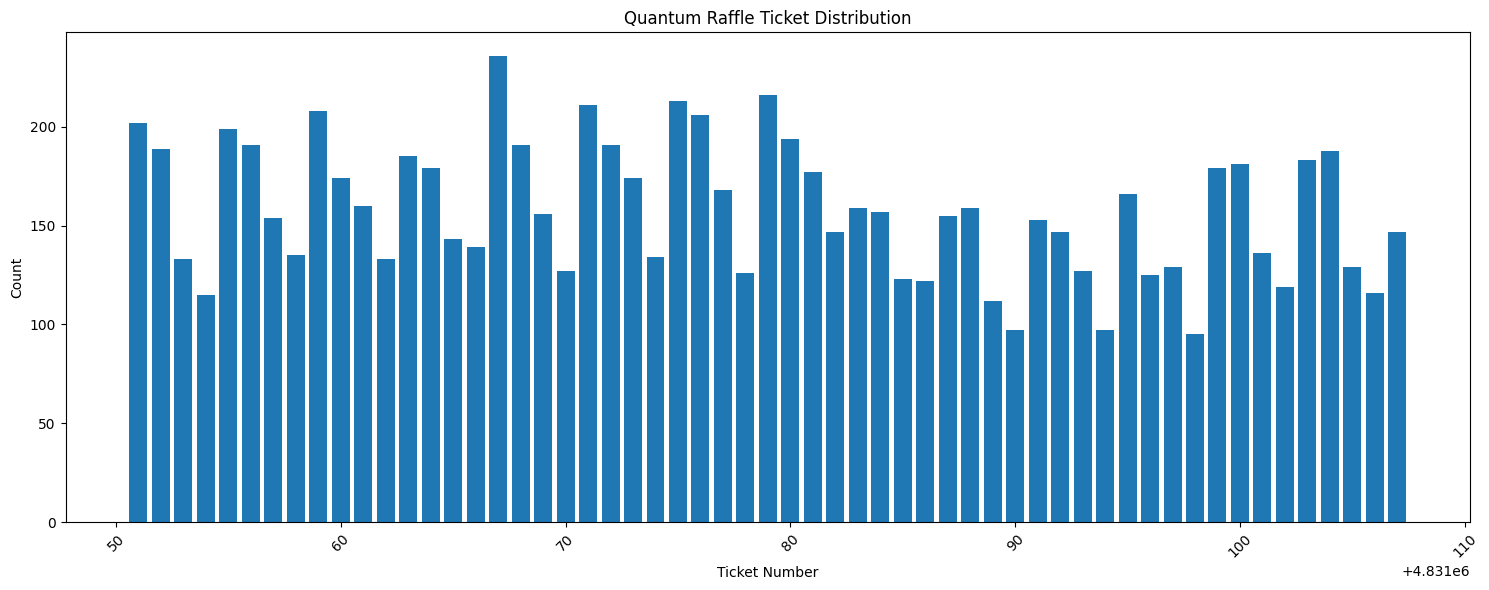


Top 30 ticket numbers by probability:

Winning tickets from highest probability to lowest:
Ticket #4831067 with 236 counts
Ticket #4831079 with 216 counts


In [6]:
from qiskit import QuantumCircuit, execute
import matplotlib.pyplot as plt
from math import ceil, log2

def create_quantum_raffle(first_ticket, last_ticket):
    # Calculate number of tickets and required qubits
    num_tickets = last_ticket - first_ticket + 1
    num_qubits = ceil(log2(num_tickets))
    max_states = 2**num_qubits

    # Create quantum circuit
    qc = QuantumCircuit(num_qubits, num_qubits)
    # Apply Hadamard gates to create superposition
    for i in range(num_qubits):
        qc.h(i)
    # Measure all qubits
    qc.measure(range(num_qubits), range(num_qubits))
    # Execute the circuit
    job = execute(qc, backend, shots=10000)
    result = job.result()
    counts = result.get_counts()
    # Convert binary results to ticket numbers
    ticket_counts = {}
    for bitstring, count in counts.items():
        number = int(bitstring, 2)
        if number < num_tickets: # Only count valid ticket numbers
            ticket_number = number + first_ticket
            ticket_counts[ticket_number] = count
    return ticket_counts

def analyze_results(ticket_counts):
    # Sort tickets by count (highest to lowest)
    sorted_tickets = sorted(ticket_counts.items(), key=lambda x: x[1], reverse=True)
    # Get top 30 tickets (or all if less than 30)
    top_30 = sorted_tickets[:30]
    return top_30

def plot_results(ticket_counts):
    plt.figure(figsize=(15, 6))
    plt.bar(ticket_counts.keys(), ticket_counts.values())
    plt.title('Quantum Raffle Ticket Distribution')
    plt.xlabel('Ticket Number')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Get input from user
first_ticket = int(input("Enter the first ticket number: "))
last_ticket = int(input("Enter the last ticket number: "))

# Run the quantum raffle
print("\nRunning quantum raffle simulation...")
ticket_counts = create_quantum_raffle(first_ticket, last_ticket)

# Plot the results
print("\nGenerating distribution plot...")
plot_results(ticket_counts)

# Analyze and display top 30 tickets
print("\nTop 30 ticket numbers by probability:")
top_30 = analyze_results(ticket_counts)

print("\nWinning tickets from highest probability to lowest:")
for i, (ticket, count) in enumerate(top_30, 1):
    input(f"\nPress Enter to reveal #{i} place ticket...")
    print(f"Ticket #{ticket} with {count} counts")

In [ ]:

# Copyright 2024 Erik Garcell, Stefan Seegerer
# 
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.